In [ ]:
a = 3
a

In [1]:
# test harness for evaluating models on the cifar10 dataset
# NOTE: no model is defined, this example will not run
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    #evaluation Test Harness 242
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

In [2]:
# define cnn model
def define_VGG1_model(loss_function ='categorical_crossentropy'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])
    
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
    
    return history.history

In [3]:
def run_test_harness(model, train_X, train_Y, test_X, test_Y):
    # prepare pixel data
    train_X, test_X = prep_pixels(train_X, test_X)
    # fit model
    history = model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_data=(test_X, test_Y), verbose=0)
    # evaluate model
    _ , acc = model.evaluate(test_X, test_Y, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    diagnostics_history = summarize_diagnostics(history)
    
    return _, acc, history, diagnostics_history

def run_test_harness_2():
    # load dataset
    trainX, trainY, testX, testY = load_cifar10_dataset()
    # probamos con pocos datos:
    trainX, trainY, testX, testY = trainX[:1000], trainY[:1000], testX[:200], testY[:200]
    # prepare pixel data
    trainX_categ, testX_categ = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

In [ ]:
# run the test harness for evaluating a model
    vgg1_model = define_VGG1_model(loss_function = 'categorical_crossentropy')
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    train_X_10k=trainX[:10000]
    train_Y_10k=trainY[:10000]
    test_X_10k=testX[:2000]
    test_Y_10k=testY[:2000]
    #entry point, run the test harness
_, acc, history, diagnostics_history = run_test_harness(vgg1_model, trai, X_10k, train_Y_10k, test_X_10k, test_Y_10k)

In [ ]:
# define cnn model
    def define_VGG2_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padd         ing='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model    

In [ ]:
# run the test harness for evaluating a model
vgg1_model = define_VGG1_model(loss_function = 'categorical_crossentropy')
#entry point, run the test harness
vgg2_, vgg2_acc, vgg2_history, vgg2_diagnostics_history = run_test_harness(vgg1_model, train_X_10k, tra,_Y_10k, test_X_10k, test_Y_10k)

In [ ]:
# baseline model with data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

# load train and test dataset
def load_cifar10_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
    
# define cnn model
def define_model(learning_rate=0.001, momentum=0.9):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate, momentum=momentum)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100,
    validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, model_learning_rate, model_momentum, n_folds=5):
    from tqdm import tqdm
    from sklearn.model_selection import KFold
    
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    k = 0
    for train_ix, test_ix in tqdm(kfold.split(dataX)):
        print('kfold {}'.format(k))
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], \
                                       dataY[test_ix]
        # fit model
        defined_model = define_model(learning_rate=model_learning_rate, momentum=model_momentum)
        history = defined_model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX,
                            testY), verbose=0) #, steps_per_epoch=steps)
        # evaluate model
        _, acc = defined_model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
        
        k = k + 1
        
    return defined_model, scores, histories


Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [2]:
# load train and test dataset
def load_cifar10_dataset_no_categorical():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    return trainX, trainY, testX, testY

def load_cifar10_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from numpy import expand_dims
import numpy as np

# load data
trainX, trainY, testX, testY = load_cifar10_dataset_no_categorical()
# probamos con pocos datos:
trainX, trainY, testX, testY = trainX[:500], trainY[:500], testX[:100], testY[:100]

# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

In [ ]:
augmentations_number = 9
    trainX_set = trainX
    trainY_set = trainY
    
    #img_augmented_dataset_shape = np.expand_dims(np.array(img.shape), axis=0)
    img_augmented_trainset = ([]) 
    img_augmented_target = ([]) 
    i = 0
    for img in trainX_set:
        # convert to numpy array
        data = img_to_array(img)
        # expand dimension to one sample
        samples = expand_dims(data, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #(zoom_range=[0.5,1.0])
        # prepare iterator
        it = datagen.flow(samples, batch_size=64) #batch_size=1)
        
        for j in range(augmentations_number):
            # define subplot
            #pyplot.subplot(330 + 1 + j)
            # generate batch of images
            batch = it.next()
            # convert to unsigned integers for viewing
            image = batch[0].astype('uint8')
            
            img_augmented_trainset.append(image)        
            img_augmented_target.append(trainY_set[i].astype('int'))
            
            #plot raw pixel data
            #pyplot.imshow(image)
        
        i = i+1
        #show the figure
        #pyplot.show()
        
    img_augmented_trainset = np.array(img_augmented_trainset)
    img_augmented_target = np.array(img_augmented_target)
assert len(img_augmented_trainset) == len(img_augmented_target)

In [63]:
# load dataset
trainX_categ, trainY_categ, testX_categ, testY_categ = load_cifar10_dataset()
# probamos con pocos datos:
trainX_categ, trainY_categ, testX_categ, testY_categ = trainX_categ[:30], trainY_categ[:30], testX_categ[:10], testY_categ[:10]
# prepare pixel data
trainX_categ, testX_categ = prep_pixels(trainX_categ, testX_categ)

In [10]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, model, n_folds=5):
    from tqdm import tqdm
    from sklearn.model_selection import KFold
    
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    k = 0
    for train_ix, test_ix in tqdm(kfold.split(dataX)):
        print('kfold {}'.format(k))
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], \
                                       dataY[test_ix]
        # fit model
        defined_model = defined_model()
        history = defined_model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX,
                            testY), verbose=0) #, steps_per_epoch=steps)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
        
        k = k + 1
        
    return model, scores, histories


In [134]:
# evaluate a model using k-fold cross-validation
dataX = it_train[0][0]
dataY = it_train[0][1]
mi_model = define_model()
mi_model, scores, histories = evaluate_model(dataX, dataY, model)


0it [00:00, ?it/s]kfold 0
> 41.000
1it [01:20, 80.86s/it]kfold 1
> 98.000
2it [02:40, 80.49s/it]kfold 2
> 100.000
3it [03:59, 80.19s/it]kfold 3
> 100.000
4it [05:19, 80.01s/it]kfold 4
> 100.000
5it [06:39, 79.97s/it]


## Como vimos, si no reiniciamos el modelo en cada una de las 5 iteraciones del kfold cross-val, los pesos se guardan y acaba sobreajustando al set de entrenamiento 

In [64]:
# create data generator
#datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #, zoom_range=[0.5,1.0])
datagen = ImageDataGenerator(horizontal_flip=True) #, zoom_range=[0.5,1.0])
# prepare iterator
it_train = datagen.flow(trainX_categ, trainY_categ, batch_size=len(trainX_categ)) #batch_size=1)
len(it_train)
len(it_train[0][1])

30

## Checkeo si hay alguna imagen aumentada de entre las 'it_train', porque vemos que el número de registros aquí es el mismo que en el dataset original (trainX_categ, trainY_categ) y eso no me cuadra:

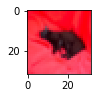

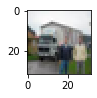

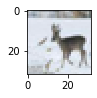

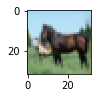

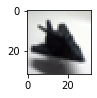

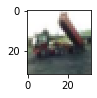

In [61]:
i = 0
for i in range(0, 6):
    pyplot.subplot(330+1)
    img_plot = pyplot.imshow(array_to_img(it_train[0][0][i]))

    # show the figure
    pyplot.show()

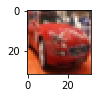

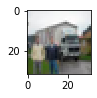

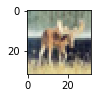

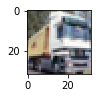

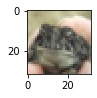

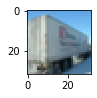

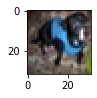

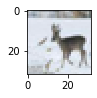

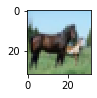

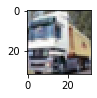

In [68]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

i = 0
for batch in it_train: #datagen.flow(imgs_preps, imgs_labels, batch_size=1):
    pyplot.figure(i)
    pyplot.subplot(330 + 1)
    img_plot = pyplot.imshow(array_to_img(batch[0][0]))

    i += 1
    if i > 9:
        break 
# show the figure
pyplot.show()

## Pruebo a generar mi dataset aumentado, tras comprobar que este bucle genera realmente imágenes aumentadas (en este caso en base a 'horizontal flip'):

In [115]:
import numpy as np 

augmented_imgs_dataset = ([])
augmented_labels = ([])
i = 0
for image in it_train: 
    augm_img = image[0][i]
    label = image[1][i]
    #print('label: ', label)
    #print('augm_img: ', augm_img)   
    '''
    pyplot.figure(i)
    pyplot.subplot(330 + 1)
    img_plot = pyplot.imshow(array_to_img(augm_img))
    '''
    augmented_imgs_dataset.append(augm_img)
    augmented_labels.append(label)

    i += 1
    if i > 10:
        break

#pyplot.show()
augmented_imgs_dataset = np.array(augmented_imgs_dataset)
augmented_labels = np.array(augmented_labels)

label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
label:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


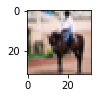

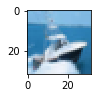

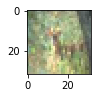

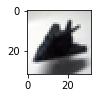

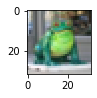

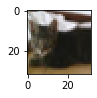

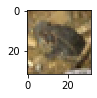

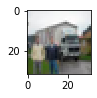

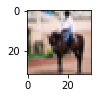

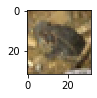

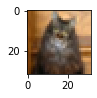

In [120]:
i = 0
for aug_img_ in augmented_imgs_dataset:
    print('label: ', augmented_labels[i])
    pyplot.figure(i)
    pyplot.subplot(330 + 1)
    img_plot = pyplot.imshow(array_to_img(aug_img_))
    i += 1

pyplot.show()    

## Y con esto vemos que efectivamente tenemos bien construido nuestro dataset, en el que parecen respetarse las etiquetas con las aug. imgs; ahora lo construimos entero

In [ ]:
# load dataset
trainX_categ, trainY_categ, testX_categ, testY_categ = load_cifar10_dataset()
# probamos con pocos datos:
trainX_categ, trainY_categ, testX_categ, testY_categ = trainX_categ[:50], trainY_categ[:50], testX_categ[:10], testY_categ[:10]
# prepare pixel data
trainX_categ, testX_categ = prep_pixels(trainX_categ, testX_categ)

# create data generator
#datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #, zoom_range=[0.5,1.0])
datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=[0.5,1.0])
# prepare iterator
it_train = datagen.flow(trainX_categ, trainY_categ, batch_size=len(trainX_categ)) #batch_size=1)

augmented_imgs_dataset = ([])
augmented_labels = ([])

# índice j para controlar el número de data augmentations que queremos aplicar; aplicamos 6 en este caso
j = 0
for j in range(3):
    i = 0
    for image in it_train: 
        augm_img = image[0][i]
        label = image[1][i]
        augmented_imgs_dataset.append(augm_img)
        augmented_labels.append(label)

        i += 1
        if i > len(trainX_categ)-1:
            break
    j += 1
    if j > 2:
        break


Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [10]:
augmented_imgs_dataset = np.array(augmented_imgs_dataset)
augmented_labels = np.array(augmented_labels)

assert len(augmented_imgs_dataset) == len(trainX_categ)*3
assert len(augmented_labels) == len(trainY_categ)*3

## Primero evaluamos con el dataset original de 500 registros:

In [11]:
# evaluate a model using k-fold cross-validation
dataX = it_train[0][0]
dataY = it_train[0][1]

mi_model, scores, histories = evaluate_model(dataX, dataY, 0.001, 0.9)


0it [00:00, ?it/s]kfold 0
> 20.000

1it [00:13, 13.44s/it]kfold 1
> 20.000

2it [00:26, 13.40s/it]kfold 2
> 10.000

3it [00:40, 13.61s/it]kfold 3
> 20.000

4it [00:55, 13.78s/it]kfold 4
> 10.000

5it [01:09, 13.83s/it]


NameError: name 'model' is not defined

## Seguidamente evaluamos sobre el dataset aumentado de 1500 registros:

In [0]:
mi_model_aug_ds = define_model()
mi_model_aug_ds, scores_aug_ds, histories_aug_ds = evaluate_model(augmented_imgs_dataset, augmented_labels, mi_model_aug_ds)


## GridSearch CV con algunos hiperparams de la red:

In [0]:
import pandas as pd 

cv_results_df = pd.DataFrame(columns=['width_shift_range', 'height_shift_range', 'horizontal_flip', 'learning_rate', 'momentum', 'mean_score']) 
#'width_shift_range'=0.1, height_shift_range=0.1, horizontal_flip=True

hiperparams_values = [(0.001, 0.85), (0.01, 0.9), (0.001, 0.95)]
# evaluate a model using k-fold cross-validation
for lr, momentum in hiperparams_values:
    mi_model_aug_ds, scores_aug_ds, histories_aug_ds = evaluate_model(augmented_imgs_dataset, augmented_labels, lr, momentum)

    series_values = pd.Series({'learning_rate': lr, 'momentum': momentum, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 
                               'mean_score': np.array(scores_aug_ds).mean()}) 
    cv_results_df = cv_results_df.append(series_values, ignore_index=True)

cv_results_df

In [138]:

_, acc_valid_set = mi_model.evaluate(testX_categ[:100], testY_categ[:100], verbose=0)
acc_valid_set

0.32

In [140]:

__, acc_test_set_sin_aug = mi_model.evaluate(dataX, dataY, verbose=0)
acc_test_set_sin_aug

0.816

In [149]:
# test en nuevo dataset:
# load dataset
trainX_categ, trainY_categ, testX_categ, testY_categ = load_cifar10_dataset()
___, mi_model_acc = mi_model.evaluate(testX_categ[1200:1300], testY_categ[1200:1300])
mi_model_acc

32/100 [========>.....................] - ETA: 0s - loss: 1333.6560 - acc: 0.31 96/100 [===========================>..] - ETA: 0s - loss: 1233.4668 - acc: 0.29100/100 [==============================] - 0s 1ms/sample - loss: 1195.5382 - acc: 0.3000


0.3

In [142]:
# test en nuevo dataset; espero tener resultado modesto por sobreajuste
# load dataset
trainX_categ, trainY_categ, testX_categ, testY_categ = load_cifar10_dataset()
___, mi_model__reiniciard_acc = mi_model_sin_reiniciar.evaluate(testX_categ[1200:1300], testY_categ[1200:1300])
mi_model_sin_reiniciar_acc


32/100 [========>.....................] - ETA: 0s - loss: 1320.9124 - acc: 0.40 96/100 [===========================>..] - ETA: 0s - loss: 1454.7731 - acc: 0.30100/100 [==============================] - 0s 1ms/sample - loss: 1414.3402 - acc: 0.3200


0.32

In [154]:
# evaluate a model using k-fold cross-validation
dataX = it_train[0][0]
dataY = it_train[0][1]
mi_model = define_model()
mi_model_5k, scores_5k, histories_5k = evaluate_model(dataX, dataY, model)

0it [00:00, ?it/s]kfold 0
> 45.300
1it [13:09, 789.37s/it]kfold 1
> 46.000
2it [26:33, 793.69s/it]kfold 2


KeyboardInterrupt: 

In [193]:
import pandas as pd 

cv_results_df = pd.DataFrame(columns=['width_shift_range', 'height_shift_range', 'horizontal_flip', 'learning_rate', 'momentum', 'mean_score']) 
#'width_shift_range'=0.1, height_shift_range=0.1, horizontal_flip=True

hiperparams_values = [(0.001, 0.85), (0.01, 0.9), (0.001, 0.95)]
# evaluate a model using k-fold cross-validation
dataX = it_train[0][0]
dataY = it_train[0][1]

for lr, momentum in hiperparams_values:
    mi_model = define_model(learning_rate=lr, momentum=momentum)
    mi_model, scores, histories = evaluate_model(dataX, dataY, model)

    series_values = pd.Series({'learning_rate': lr, 'momentum': momentum, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 
                               'mean_score': np.array(scores).mean()}) 
    cv_results_df = cv_results_df.append(series_values, ignore_index=True)

cv_results_df



0it [00:00, ?it/s]kfold 0
> 65.460


1it [2:21:14, 8474.74s/it]kfold 1
> 66.480


2it [4:40:22, 8436.63s/it]kfold 2
> 67.320


3it [6:59:50, 8416.19s/it]kfold 3
> 65.860


4it [9:19:09, 8398.87s/it]kfold 4
> 65.080


5it [11:42:16, 8427.25s/it]


0it [00:00, ?it/s]kfold 0


KeyboardInterrupt: 

In [ ]:
____, mi_model_5k_acc = mi_model_5k.evaluate(testX_categ[1200:1300], testY_categ[1200:1300])
mi_model_5k_acc

In [194]:
cv_results_df

,width_shift_range,height_shift_range,horizontal_flip,learning_rate,momentum,mean_score
0,0.1,0.1,True,0.001,0.85,0.6604


In [319]:
cv_results_df_dicticio = cv_results_df

series_values = pd.Series({'learning_rate': 0.01, 'momentum': 0.9, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 
                               'mean_score': 0.69}) 
cv_results_df_dicticio = cv_results_df_dicticio.append(series_values, ignore_index=True)
series_values = pd.Series({'learning_rate': 0.001, 'momentum': 0.95, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 
                               'mean_score': 0.74}) 
cv_results_df_dicticio = cv_results_df_dicticio.append(series_values, ignore_index=True)

cv_results_df_dicticio

,width_shift_range,height_shift_range,horizontal_flip,learning_rate,momentum,mean_score
0,0.1,0.1,True,0.001,0.85,0.6604
1,0.1,0.1,True,0.010,0.90,0.6900
2,0.1,0.1,True,0.001,0.95,0.7400
